In [5]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from ripser import Rips
from persim import PersImage
from persim import PersistenceImager

In [3]:
N = 200
N_per_class = int(N / 2)
N_in_class = 400

def noise(N, scale):
    return scale * np.random.random((N, 2))

def circle(N, scale, offset):
    return offset + scale * datasets.make_circles(n_samples=N, factor=0.4, noise=0.05)[0]

just_noise = [noise(N_in_class, 150) for _ in range(N_per_class)]

half = int(N_in_class / 2)
with_circle = [np.concatenate((circle(half, 50, 70), noise(half, 150)))
               for _ in range(N_per_class)]

datas = []
datas.extend(just_noise)
datas.extend(with_circle)

# Define labels
labels = np.zeros(N)
labels[N_per_class:] = 1

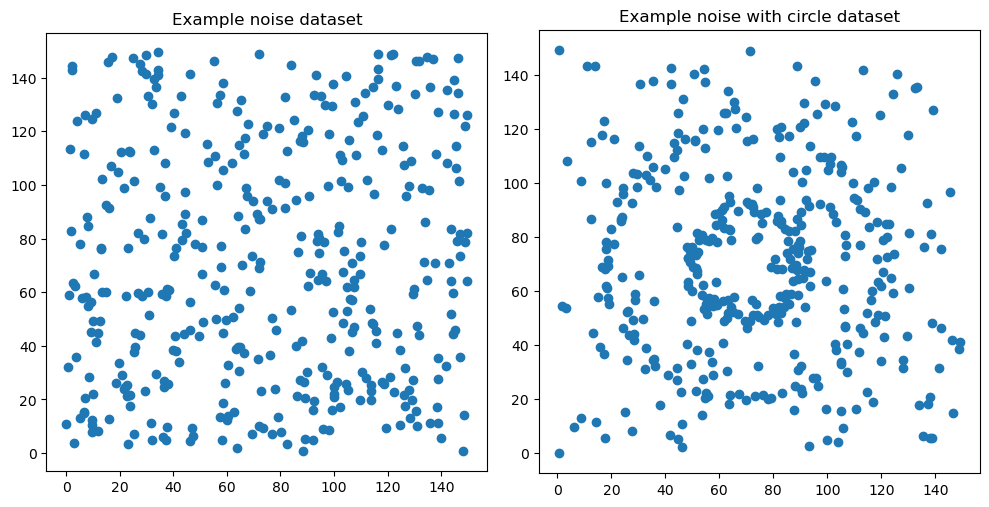

In [8]:
# Visualize the data
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10,5)

xs, ys = just_noise[0][:,0], just_noise[0][:,1]
axs[0].scatter(xs, ys)
axs[0].set_title("Example noise dataset")
axs[0].set_aspect('equal', 'box')

xs_, ys_ = with_circle[0][:,0], with_circle[0][:,1]
axs[1].scatter(xs_, ys_)
axs[1].set_title("Example noise with circle dataset")
axs[1].set_aspect('equal', 'box')

fig.tight_layout()
plt.show()

In [9]:
rips = Rips(maxdim=1, coeff=2)
diagrams = [rips.fit_transform(data) for data in datas]
diagrams_h1 = [rips.fit_transform(data)[1] for data in datas]

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


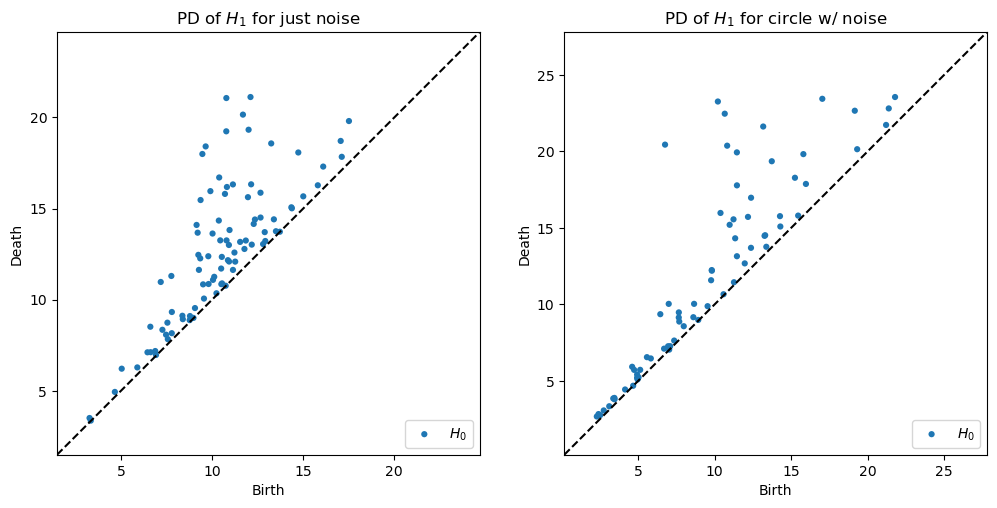

In [10]:
plt.figure(figsize=(12,6))
plt.subplot(121)

rips.plot(diagrams_h1[0], show=False)
plt.title("PD of $H_1$ for just noise")

plt.subplot(122)
rips.plot(diagrams_h1[-1], show=False)
plt.title("PD of $H_1$ for circle w/ noise")

plt.show()


In [11]:
pimgr = PersistenceImager(pixel_size=1)
pimgr.fit(diagrams_h1)
imgs = pimgr.transform(diagrams_h1)
pimgr

PersistenceImager(birth_range=(1.218482494354248, 32.21848249435425), pers_range=(-0.16825103759765625, 19.831748962402344), pixel_size=1, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})

In [12]:
pimgr


PersistenceImager(birth_range=(1.218482494354248, 32.21848249435425), pers_range=(-0.16825103759765625, 19.831748962402344), pixel_size=1, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})

In [13]:
imgs_array = np.array([img.flatten() for img in imgs])

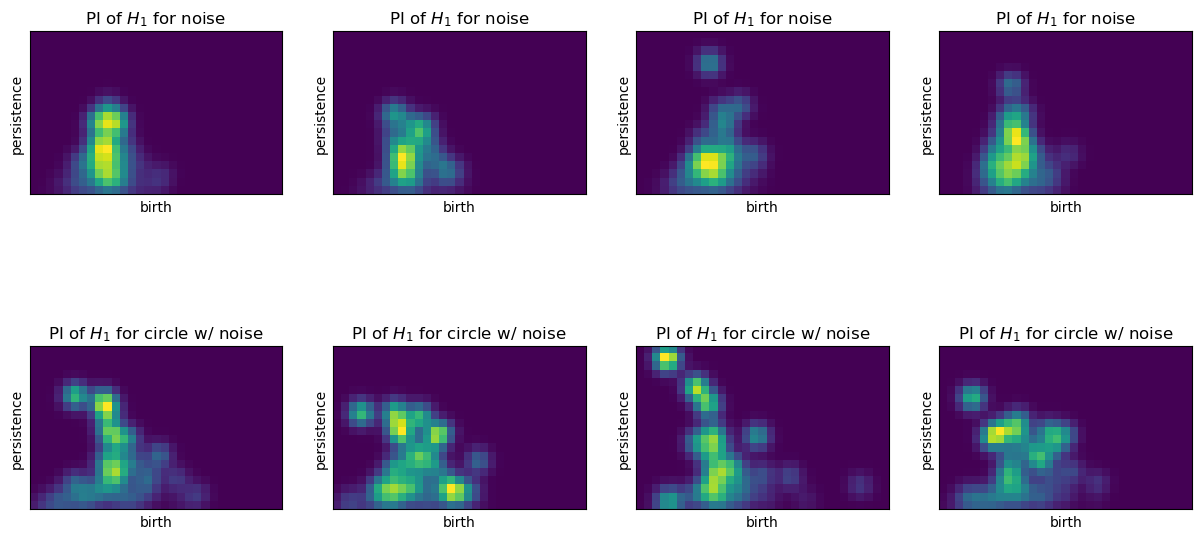

In [18]:
plt.figure(figsize=(15,7.5))

for i in range(4):
    ax = plt.subplot(240+i+1)
    pimgr.plot_image(imgs[i], ax)
    plt.title("PI of $H_1$ for noise")

for i in range(4):
    ax = plt.subplot(240+i+5)
    pimgr.plot_image(imgs[-(i+1)], ax)
    plt.title("PI of $H_1$ for circle w/ noise")
plt.show()

##### Testing for the zero persistance homology

just using 2 test data(data contaons 200 data samples)

In [19]:
#For H_0 lets plot the diagrams
rips = Rips(maxdim=1, coeff=2)
diagrams_h0 = [rips.fit_transform(data)[0] for data in datas] 

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


In [28]:
# last inf values are causing problems, they are been removed

In [25]:
diagrams_h0[0] = diagrams_h0[0][0:-1]
diagrams_h0[1] = diagrams_h0[1][0:-1]
diagrams_h0[2] = diagrams_h0[2][0:-1]
diagrams_h0[3] = diagrams_h0[3][0:-1]

In [33]:
len(diagrams_h0)

200

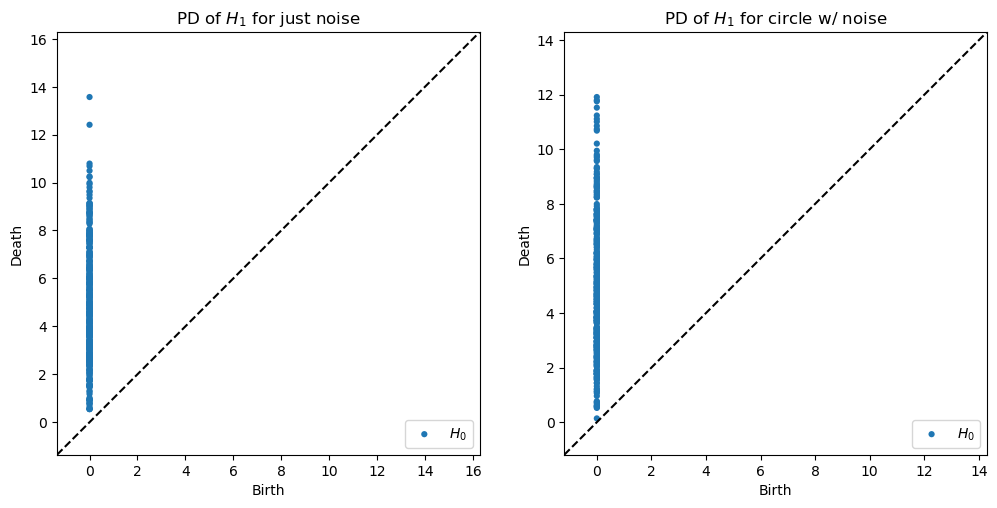

In [56]:
plt.figure(figsize=(12,6))
plt.subplot(121)

rips.plot(diagrams_h0[0], show=False)
plt.title("PD of $H_1$ for just noise")

plt.subplot(122)
rips.plot(diagrams_h0[1], show=False)
plt.title("PD of $H_1$ for circle w/ noise")

plt.show()

In [48]:
pimgr = PersistenceImager(pixel_size=0.1, birth_range=(0,1))
pimgr.fit(diagrams_h0[0:4], skew=True)
imgs = pimgr.transform(diagrams_h0)
pimgr

PersistenceImager(birth_range=(0.0, 0.0), pers_range=(0.12433540225028938, 13.824335402250291), pixel_size=0.1, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})

In [49]:
pimgr

PersistenceImager(birth_range=(0.0, 0.0), pers_range=(0.12433540225028938, 13.824335402250291), pixel_size=0.1, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})

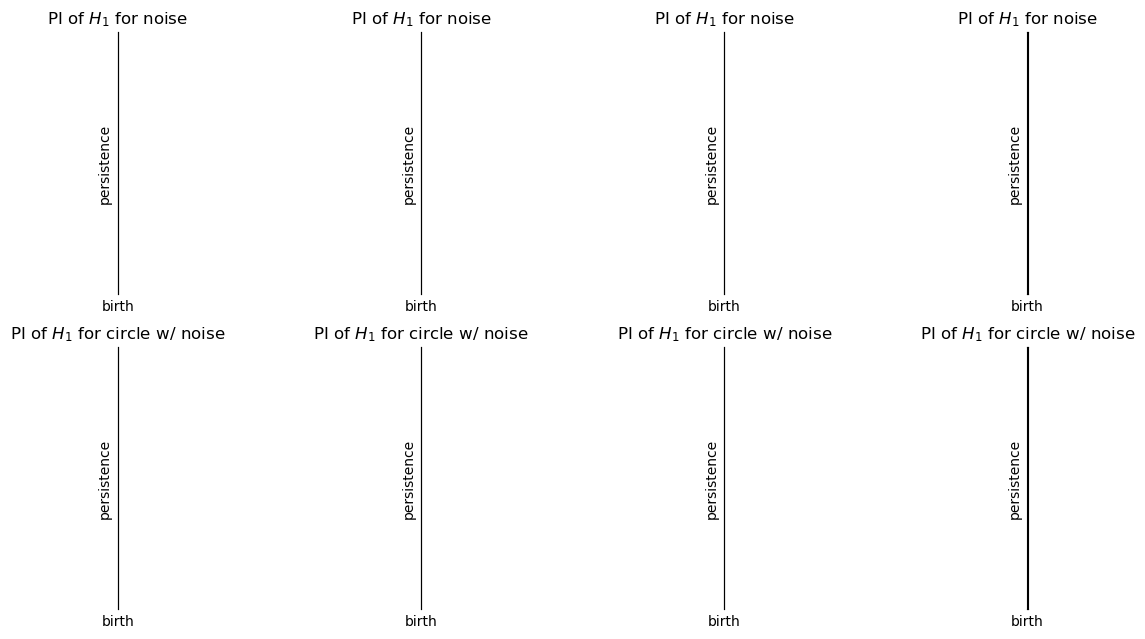

In [50]:
plt.figure(figsize=(15,7.5))

for i in range(4):
    ax = plt.subplot(240+i+1)
    pimgr.plot_image(imgs[i], ax)
    plt.title("PI of $H_1$ for noise")

for i in range(4):
    ax = plt.subplot(240+i+5)
    pimgr.plot_image(imgs[-(i+1)], ax)
    plt.title("PI of $H_1$ for circle w/ noise")
plt.show()

In [57]:
# Lets try for both H_0 and H_1

In [68]:
diagrams_h0_h1 = [rips.fit_transform(data) for data in datas[0:2]] 

In [70]:
diagrams_h0_h1[0][0] = diagrams_h0_h1[0][0][0:-1]
diagrams_h0_h1[1][0] = diagrams_h0_h1[1][0][0:-1]

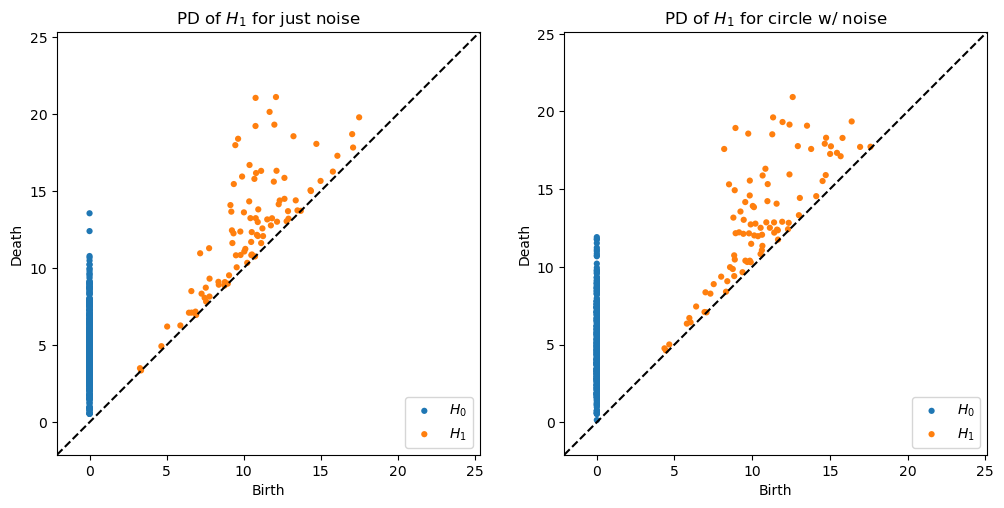

In [71]:
plt.figure(figsize=(12,6))
plt.subplot(121)

rips.plot(diagrams_h0_h1[0], show=False)
plt.title("PD of $H_1$ for just noise")

plt.subplot(122)
rips.plot(diagrams_h0_h1[1], show=False)
plt.title("PD of $H_1$ for circle w/ noise")

plt.show()

In [72]:
# The resolution of the persistence image is adjusted by choosing the pixel size, given in the same units as the diagram
pimgr = PersistenceImager(pixel_size=1)
pimgr.fit(diagrams_h0_h1[0])

fig, axs = plt.subplots(1, 3, figsize=(20,5))
pimgr.plot_diagram(diagrams_h0_h1[0], skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.plot_image(pimgr.transform(diagrams_h0_h1[0]), ax=axs[1])
axs[1].set_title('Pixel Size: 1', fontsize=16)

pimgr.pixel_size = 0.1 
pimgr.plot_image(pimgr.transform(diagrams_h0_h1[0]), ax=axs[2])
axs[2].set_title('Pixel Size: 0.1', fontsize=16)

plt.tight_layout()
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [75]:
# this library is does not allow to use two types of homology at the same time to create the persistence image

##### Lets use a zero homology foe a dataset 

In [78]:
# inf values are causing problems, they are been removed
diagram_h0 = diagrams_h0_h1[0][0]

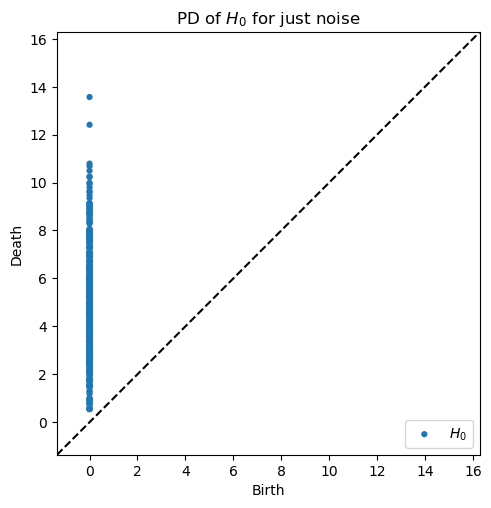

In [77]:
plt.figure(figsize=(12,6))
plt.subplot(121)

rips.plot(diagram_h0, show=False)
plt.title("PD of $H_0$ for just noise")

plt.show()

In [88]:
# For the default bivariate normal Gaussian kernel, the parameter controlling the spread (sigma) may be specified 
# either by a float or a 2x2 covariance matrix
pimgr = PersistenceImager(pixel_size=0.1, birth_range=(-0.5,0.5))
pimgr.fit(diagram_h0)

In [89]:
print(pimgr)

PersistenceImager(birth_range=(0.0, 0.0), pers_range=(0.5057851791381829, 13.605785179138184), pixel_size=0.1, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})


In [115]:
pimgr.pixel_size = 1
pimgr.birth_range = (-4, 4)
pimgr.pers_range = (0, 15)
pimgr.weight = lambda x: 1

In [116]:
print(pimgr)
print(pimgr.resolution)

PersistenceImager(birth_range=(-4.0, 4.0), pers_range=(0.0, 15.0), pixel_size=1, weight=<lambda>, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': 0.1})
(8, 15)


In [117]:
fig, axs = plt.subplots(1, 2, figsize=(20,5))
pimgr.kernel_params = {'sigma': .1}
pimgr.plot_diagram(diagram_h0, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.kernel_params = {'sigma': 0.1}
pimgr.plot_image(pimgr.transform(diagram_h0), ax=axs[1])
axs[1].set_title('Kernel Spread: 0.1', fontsize=16)


plt.tight_layout()
plt.show()

TypeError: <lambda>() got an unexpected keyword argument 'n'

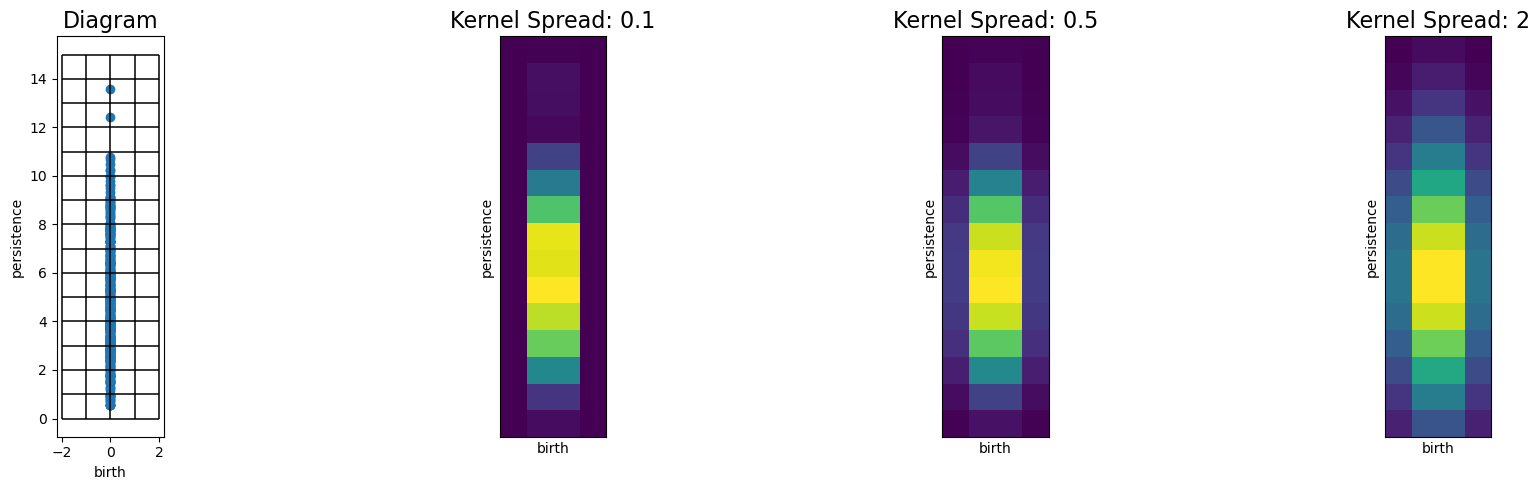

In [110]:
fig, axs = plt.subplots(1, 4, figsize=(20,5))
pimgr.kernel_params = {'sigma': .1}
pimgr.plot_diagram(diagram_h0, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.kernel_params = {'sigma': 0.1}
pimgr.plot_image(pimgr.transform(diagram_h0), ax=axs[1])
axs[1].set_title('Kernel Spread: 0.1', fontsize=16)

pimgr.kernel_params = {'sigma': .5}
pimgr.plot_image(pimgr.transform(diagram_h0), ax=axs[2])
axs[2].set_title('Kernel Spread: 0.5', fontsize=16)

# Non-isotropic, standard bivariate Gaussian with greater spread along the persistence axis
pimgr.kernel_params = {'sigma': np.array([[1, 0],[0, 6]])}
pimgr.plot_image(pimgr.transform(diagram_h0), ax=axs[3])
axs[3].set_title('Kernel Spread: 2', fontsize=16)

plt.tight_layout()
plt.show()